# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Conclusions

Three conclusion can be drawn from the data below:

* Latitude certainly effects tempature. This can be seen in the boomerang shape chart below, with the equator being the hotest.


* There does not seem to be a correlation between Latitude and the other categories. All have a persons r number less than 0.1 or greater than -0.2 which means no correlation.


* Southern hemiphere has a scarser chart. This could be the result of a lot of things such a greater number of random Northern cities chosen, but I think it is likely just that there are larger continents in the Northern Hemiphere with more data. 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [92]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:
#create list for data to gather
lat = []
lng = []
max_temp = []
humid = []
cloudy = []
winds = []
country = []
date = []
city_weather = []

#variables for records
record_num = 0
Set = 1

print("Beginning Data Retrieval")
print("----------------------------")

#loop through cities retreiving data for each city
for i in cities:
    time.sleep(1)
    
    #check to see if there is data for city
    try:
        query_url = (f"https://api.openweathermap.org/data/2.5/weather?q={i}&appid={weather_api_key}&units=imperial")
        response = requests.get(query_url).json()

        if record_num == 50:
            Set += 1
            record_num = 0
        else:
            record_num += 1 
            
        #print record saying which city is being processed
        print(f"Processing Record {record_num} of Set {Set} | {i}")
        
        #get data for city 
        cities_lng = response['coord']['lon']
        cities_lat = response['coord']["lat"]
        cities_max_temp = response['main']['temp_max']
        cities_humid = response['main']['humidity']
        cities_cloudy = response['clouds']['all']
        cities_winds = response['wind']['speed']
        cities_country = response['sys']['country']
        cities_date = response['dt']

        #Create dictionary with data gathered
        city_weather.append({
        "City": i,
        "Lat": cities_lat,
        "Lng": cities_lng,
        "Max Temp": cities_max_temp,
        "Humidity": cities_humid,
        "Cloudiness": cities_cloudy,
        "Wind Speed": cities_winds,
        "Country": cities_country,
        "Date": cities_date
        })

    except:
        print(f"City {i} not found... Sorry!")
        pass
    
print("Complete!")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | coolum beach
Processing Record 2 of Set 1 | vilhena
Processing Record 3 of Set 1 | challapata
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | pimentel
Processing Record 6 of Set 1 | ladan
Processing Record 7 of Set 1 | belushya guba
City belushya guba not found... Sorry!
Processing Record 8 of Set 1 | cagayan de tawi-tawi
City cagayan de tawi-tawi not found... Sorry!
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | san policarpo
Processing Record 11 of Set 1 | sept-iles
Processing Record 12 of Set 1 | antalaha
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | grand-santi
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | kaeo
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | vaitupu
City vaitupu not found... Sor

Processing Record 26 of Set 4 | imbituba
Processing Record 27 of Set 4 | toliary
City toliary not found... Sorry!
Processing Record 28 of Set 4 | lasa
Processing Record 29 of Set 4 | redcar
Processing Record 30 of Set 4 | asau
Processing Record 31 of Set 4 | port hueneme
Processing Record 32 of Set 4 | aguas vermelhas
Processing Record 33 of Set 4 | bathsheba
Processing Record 34 of Set 4 | aswan
Processing Record 35 of Set 4 | faya
Processing Record 36 of Set 4 | biak
Processing Record 37 of Set 4 | union
Processing Record 38 of Set 4 | usinsk
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | ouesso
Processing Record 41 of Set 4 | arkhangelos
City arkhangelos not found... Sorry!
Processing Record 42 of Set 4 | buchanan
Processing Record 43 of Set 4 | sentyabrskiy
City sentyabrskiy not found... Sorry!
Processing Record 44 of Set 4 | neuquen
Processing Record 45 of Set 4 | cervo
Processing Record 46 of Set 4 | mezen
Processing Record 47 of Set 4 | mahebourg
Processin

Processing Record 16 of Set 8 | korsor
Processing Record 17 of Set 8 | bilibino
Processing Record 18 of Set 8 | saint-joseph
Processing Record 19 of Set 8 | marystown
Processing Record 20 of Set 8 | palmer
Processing Record 21 of Set 8 | buala
Processing Record 22 of Set 8 | qasigiannguit
Processing Record 23 of Set 8 | deputatskiy
Processing Record 24 of Set 8 | souillac
Processing Record 25 of Set 8 | gallup
Processing Record 26 of Set 8 | tazmalt
Processing Record 27 of Set 8 | banda aceh
Processing Record 28 of Set 8 | babanusah
City babanusah not found... Sorry!
Processing Record 29 of Set 8 | emerald
Processing Record 30 of Set 8 | townsville
Processing Record 31 of Set 8 | arnes
Processing Record 32 of Set 8 | pitsunda
Processing Record 33 of Set 8 | henties bay
Processing Record 34 of Set 8 | bocas del toro
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | umzimvubu
City umzimvubu not found... Sorry!
Processing Record 37 of Set 8 | maykor
Process

Processing Record 45 of Set 11 | kegayli
City kegayli not found... Sorry!
Processing Record 46 of Set 11 | wajid
Processing Record 47 of Set 11 | zhezkazgan
Processing Record 48 of Set 11 | burns lake
Processing Record 49 of Set 11 | aquiraz
Processing Record 50 of Set 11 | anzio
Processing Record 0 of Set 12 | ust-nera
Processing Record 1 of Set 12 | ambovombe
Processing Record 2 of Set 12 | santa lucia
Processing Record 3 of Set 12 | coihaique
Processing Record 4 of Set 12 | kawalu
Processing Record 5 of Set 12 | jonkoping
Processing Record 6 of Set 12 | narsaq
Processing Record 7 of Set 12 | tuatapere
Processing Record 8 of Set 12 | aklavik
Processing Record 9 of Set 12 | macklin
Processing Record 10 of Set 12 | nizhniy kuranakh
Processing Record 11 of Set 12 | adrar
Processing Record 12 of Set 12 | tsienyane
City tsienyane not found... Sorry!
Processing Record 13 of Set 12 | bonthe
Processing Record 14 of Set 12 | coahuayana
Processing Record 15 of Set 12 | kupang
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [94]:

#create pandas dataframe
weather = pd.DataFrame(city_weather)
weather.to_csv(output_data_file, index_label = "City ID")
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coolum beach,-26.5333,153.1000,74.34,61,61,6.31,AU,1628223225
1,vilhena,-12.7406,-60.1458,67.87,46,77,2.17,BR,1628223227
2,challapata,-18.9000,-66.7667,39.67,31,0,3.76,BO,1628223228
3,hilo,19.7297,-155.0900,80.33,82,90,9.22,US,1628223213
4,pimentel,-6.8367,-79.9342,63.00,84,0,3.00,PE,1628223231


In [95]:
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.603472,18.987130,69.625565,70.154783,57.358261,7.531513,1.628224e+09
std,33.556516,90.251303,13.535751,21.372799,38.190660,5.290454,2.771815e+02
min,-54.800000,-175.200000,34.650000,12.000000,0.000000,0.000000,1.628223e+09
25%,-8.970950,-57.657550,59.985000,57.000000,20.000000,3.440000,1.628223e+09
50%,22.075200,23.371600,70.450000,76.000000,71.000000,6.440000,1.628224e+09
75%,49.030500,98.242850,80.340000,87.000000,94.500000,10.710000,1.628224e+09
max,78.218600,178.416700,99.550000,100.000000,100.000000,30.560000,1.628224e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [96]:
random_cit = pd.read_csv(output_data_file)
humidity_df = random_cit.loc[random_cit["Humidity"]>100, :]
humidity_df

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [97]:
#create variables to store information from columns
Lats = random_cit["Lat"]
Max_Temp = random_cit["Max Temp"]
Humidity = random_cit["Humidity"]
Cloudiness =random_cit["Cloudiness"]
Wind_Speed = random_cit["Wind Speed"]

<IPython.core.display.Javascript object>


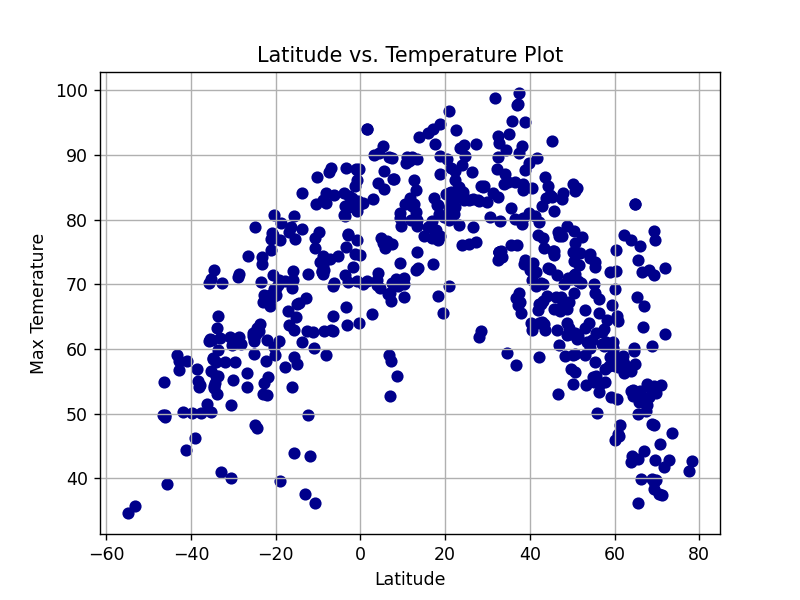

In [98]:
#scatter chart for Temp and Lat
scatter = plt.scatter(x = Lats, y = Max_Temp, c = "DarkBlue")
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Max Temerature")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


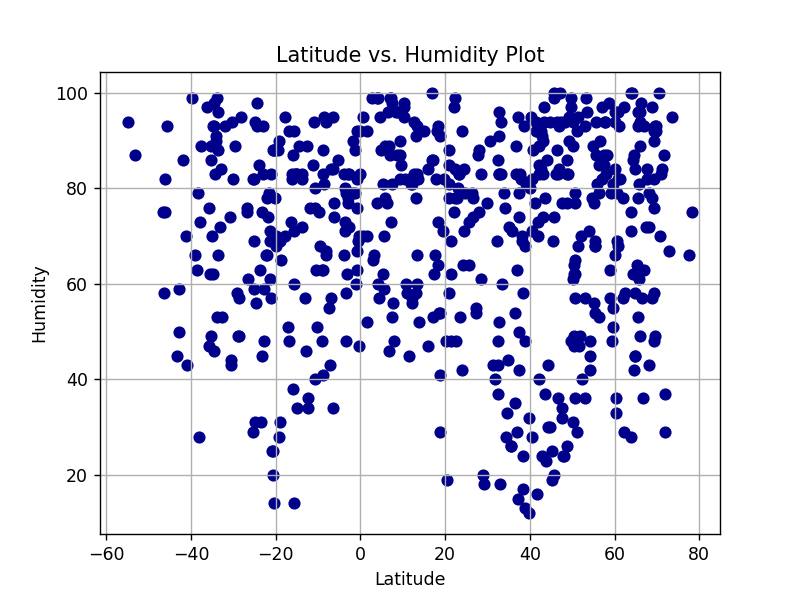

In [99]:
scatter = plt.scatter(x = Lats, y = Humidity, c = "DarkBlue")
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


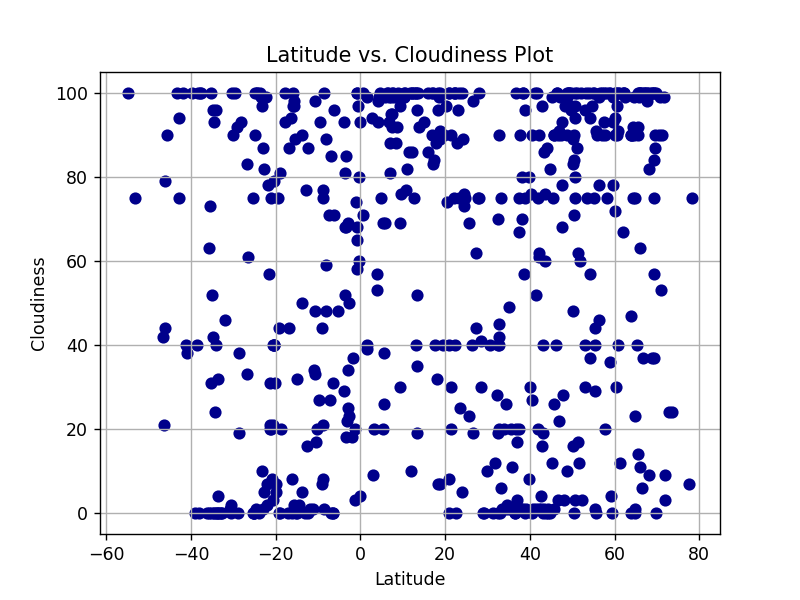

In [101]:
scatter = plt.scatter(x = Lats, y = Cloudiness, c = "DarkBlue")
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


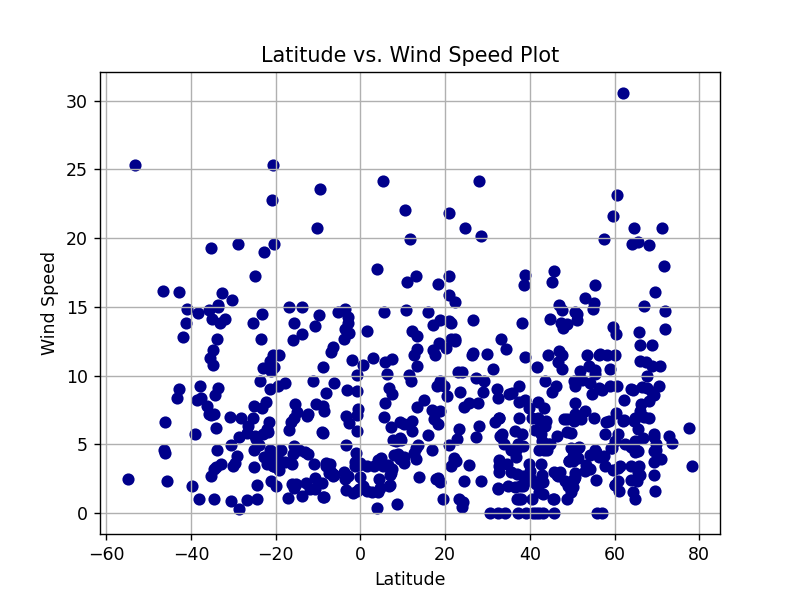

In [102]:
scatter = plt.scatter(x = Lats, y = Wind_Speed , c = "DarkBlue")
plt.title("Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

## Linear Regression

In [103]:
northern = random_cit.loc[random_cit["Lat"]>=0,:]
southern = random_cit.loc[random_cit["Lat"]<=0,:]
N_Lats = northern["Lat"]
N_Max_Temp = northern["Max Temp"]
N_Humidity = northern["Humidity"]
N_Cloudiness =northern["Cloudiness"]
N_Wind_Speed = northern["Wind Speed"]
S_Lats = southern["Lat"]
S_Max_Temp = southern["Max Temp"]
S_Humidity = southern["Humidity"]
S_Cloudiness =southern["Cloudiness"]
S_Wind_Speed = southern["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


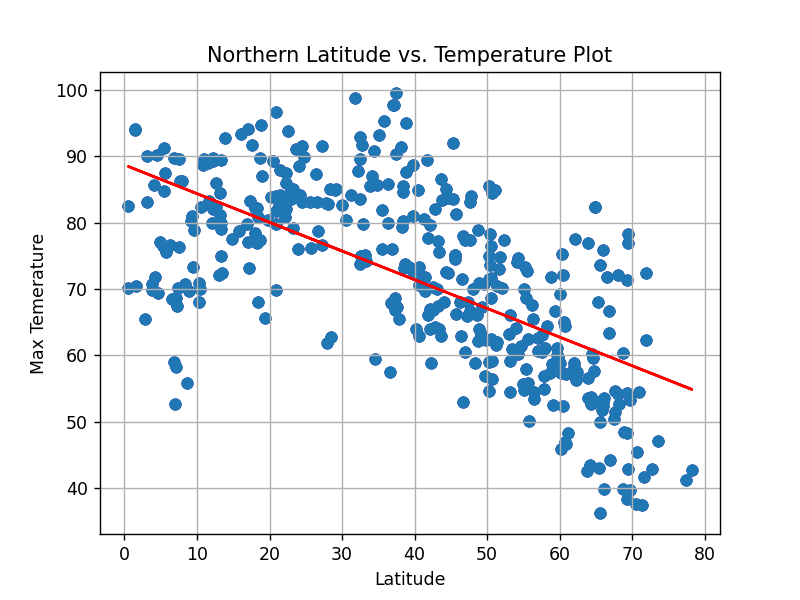

The correlation between Tempature and Latitude is -0.64


In [104]:

scatter = plt.scatter(x = N_Lats, y = N_Max_Temp, c = "DarkBlue")

correlation = st.pearsonr(N_Lats,N_Max_Temp)
print(f"The correlation between Tempature and Latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(N_Lats, N_Max_Temp)
regress_values = N_Lats * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_Lats,N_Max_Temp)
plt.plot(N_Lats,regress_values,"r-")

plt.title("Northern Latitude vs. Temperature Plot")
plt.ylabel("Max Temerature")
plt.xlabel("Latitude")
plt.grid(True)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


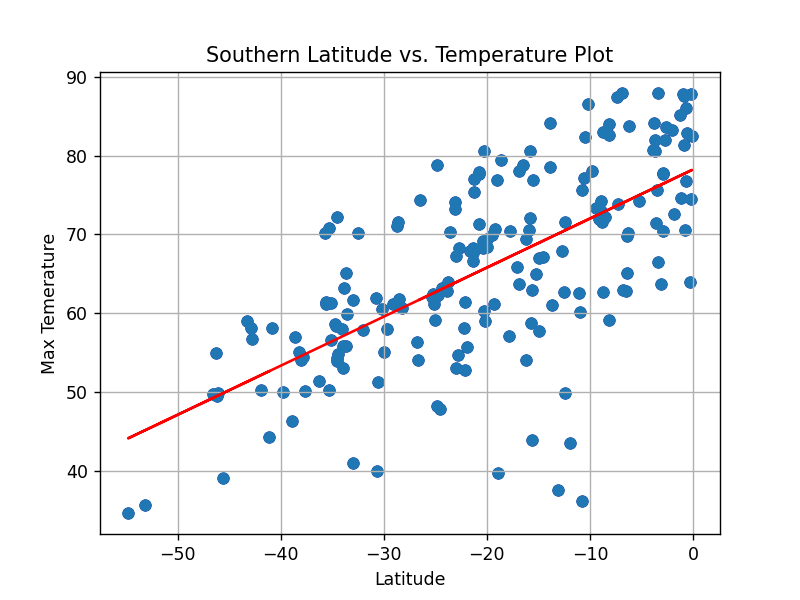

The correlation between Tempature and Latitude is 0.67


In [105]:
scatter = plt.scatter(x = S_Lats, y = S_Max_Temp, c = "DarkBlue")
plt.title("Southern Latitude vs. Temperature Plot")
plt.ylabel("Max Temerature")
plt.xlabel("Latitude")
plt.grid(True)

correlation = st.pearsonr(S_Lats,S_Max_Temp)
print(f"The correlation between Tempature and Latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(S_Lats, S_Max_Temp)
regress_values = S_Lats * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_Lats,S_Max_Temp)
plt.plot(S_Lats,regress_values,"r-")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


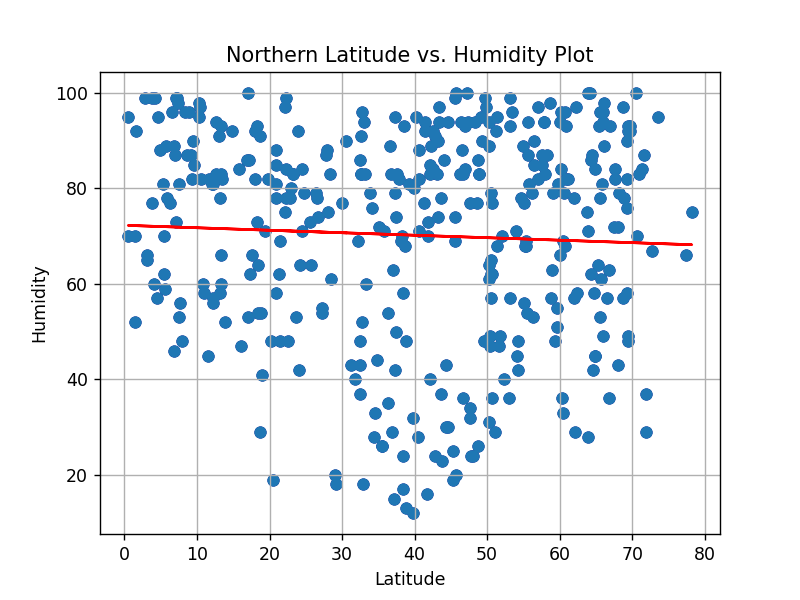

The correlation between Humidity and Latitude is -0.05


In [106]:
scatter = plt.scatter(x = N_Lats, y = N_Humidity, c = "DarkBlue")
plt.title("Northern Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

correlation = st.pearsonr(N_Lats,N_Humidity)
print(f"The correlation between Humidity and Latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(N_Lats, N_Humidity)
regress_values = N_Lats * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_Lats,N_Humidity)
plt.plot(N_Lats,regress_values,"r-")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


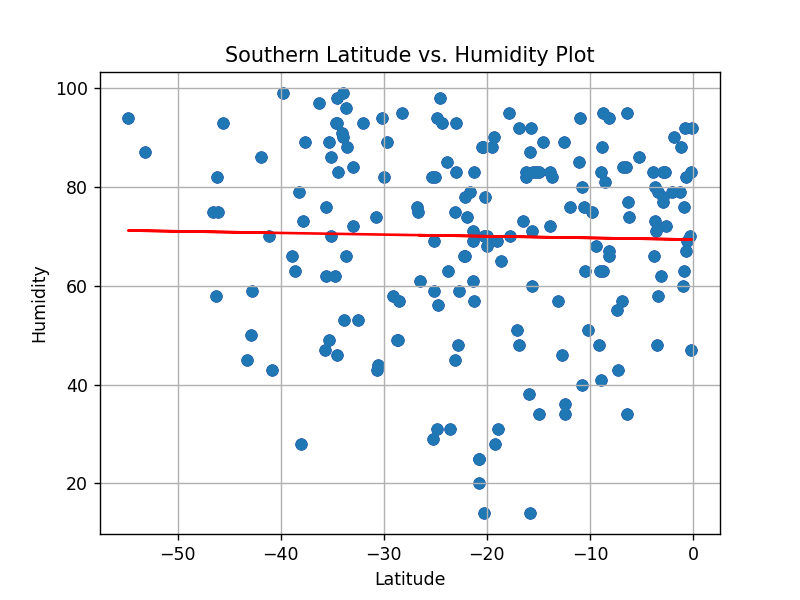

The correlation between Tempature and Latitude is -0.02


In [107]:
scatter = plt.scatter(x = S_Lats, y = S_Humidity, c = "DarkBlue")
plt.title("Southern Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

correlation = st.pearsonr(S_Lats,S_Humidity)
print(f"The correlation between Tempature and Latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(S_Lats, S_Humidity)
regress_values = S_Lats * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_Lats,S_Humidity)
plt.plot(S_Lats,regress_values,"r-")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


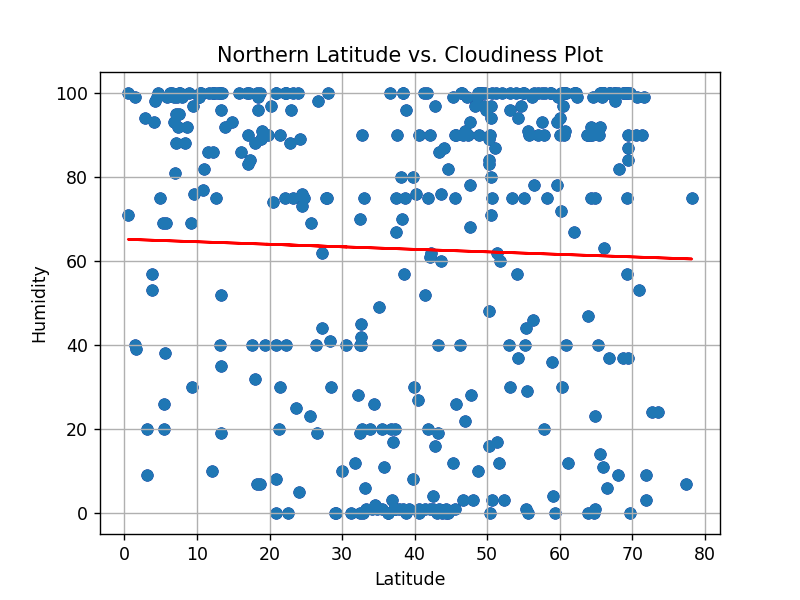

The correlation between Tempature and Latitude is -0.03


In [110]:
scatter = plt.scatter(x = N_Lats, y = N_Cloudiness, c = "DarkBlue")
plt.title("Northern Latitude vs. Cloudiness Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

correlation = st.pearsonr(N_Lats,N_Cloudiness)
print(f"The correlation between Tempature and Latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(N_Lats, N_Cloudiness)
regress_values = N_Lats * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_Lats,N_Cloudiness)
plt.plot(N_Lats,regress_values,"r-")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


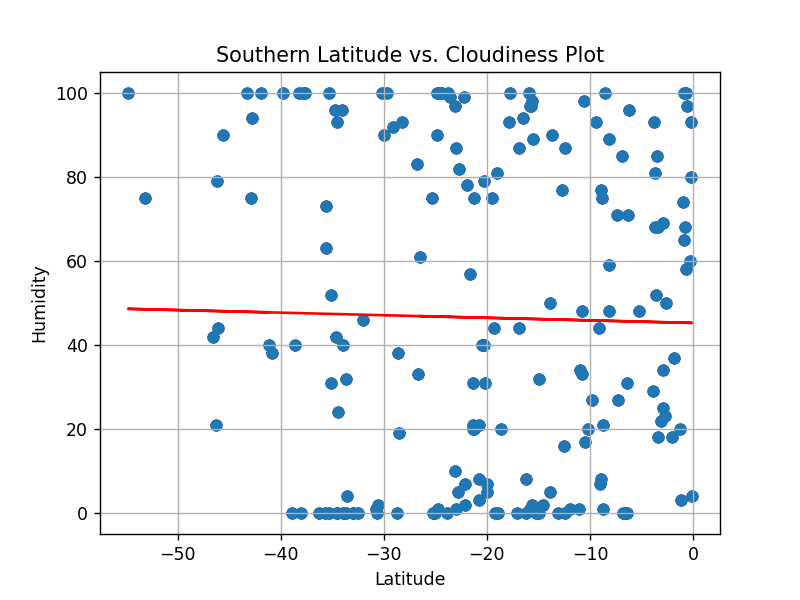

The correlation between Tempature and Latitude is -0.02


In [109]:
scatter = plt.scatter(x = S_Lats, y = S_Cloudiness, c = "DarkBlue")
plt.title("Southern Latitude vs. Cloudiness Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

correlation = st.pearsonr(S_Lats,S_Cloudiness)
print(f"The correlation between Tempature and Latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(S_Lats, S_Cloudiness)
regress_values = S_Lats * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_Lats,S_Cloudiness)
plt.plot(S_Lats,regress_values,"r-")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


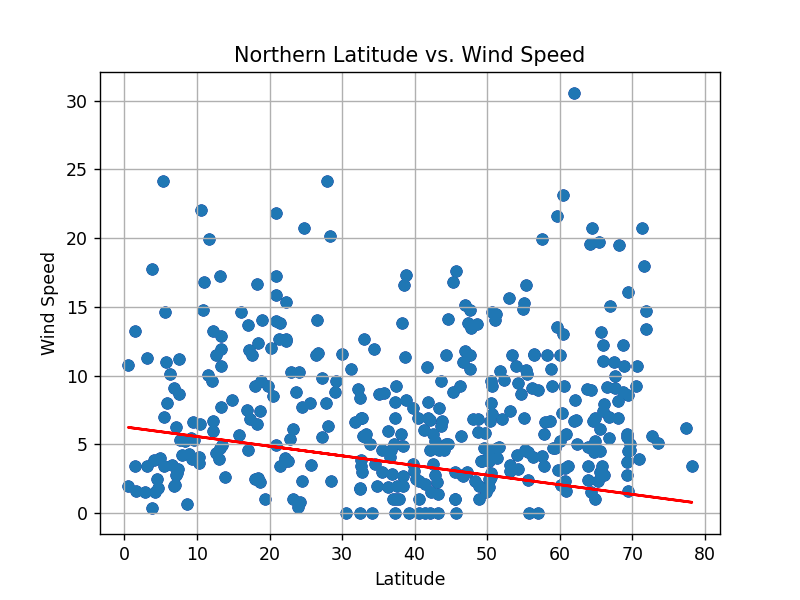

The correlation between Wind Speed and Latitude is 0.02


In [111]:
scatter = plt.scatter(x = N_Lats, y = N_Wind_Speed, c = "DarkBlue")
plt.title("Northern Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

correlation = st.pearsonr(N_Lats,N_Wind_Speed)
print(f"The correlation between Wind Speed and Latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(S_Lats, S_Wind_Speed)
regress_values = N_Lats * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_Lats,N_Wind_Speed)
plt.plot(N_Lats,regress_values,"r-")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


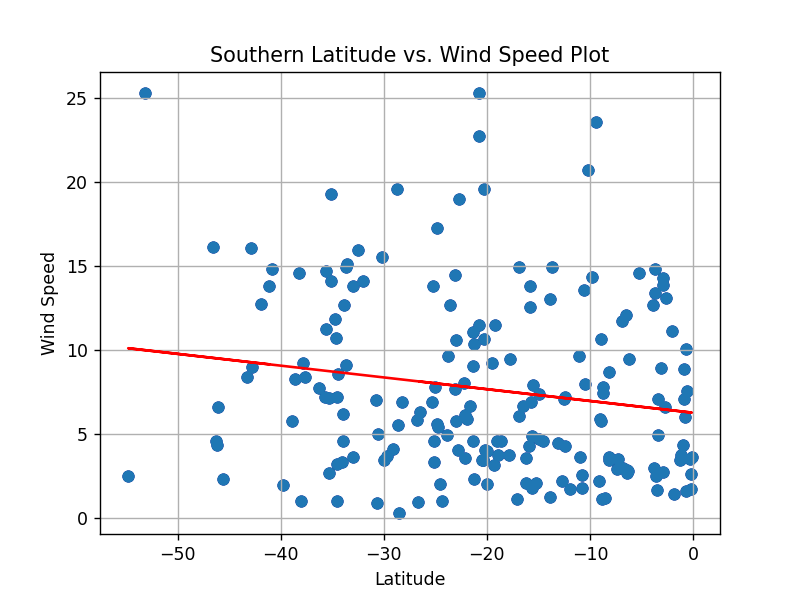

The correlation between Wind Speed and Latitude is -0.17


In [112]:
scatter = plt.scatter(x = S_Lats, y = S_Wind_Speed, c = "DarkBlue")
plt.title("Southern Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

correlation = st.pearsonr(S_Lats,S_Wind_Speed)
print(f"The correlation between Wind Speed and Latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(S_Lats, S_Wind_Speed)
regress_values = S_Lats * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_Lats,S_Wind_Speed)
plt.plot(S_Lats,regress_values,"r-")
